In [1]:
#Importing needed libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
#Comment the line below if you want interactive plots
pio.renderers.default = "jpeg"

In [2]:
#Importing data
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
#Lets see if it works.
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

25 rows *with headers* and 2 columns 

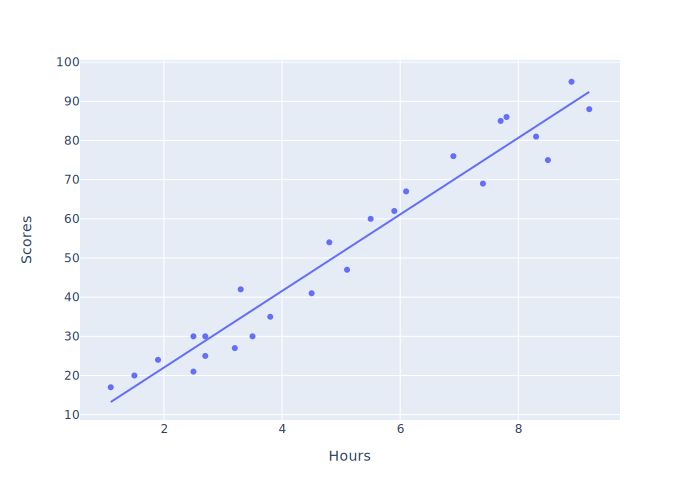

In [7]:
#Lets plot our data
fig = px.scatter(df, x="Hours", y="Scores", trendline='ols')
fig.show()

The above figure cleary shows a positive relationship between hours and scores (i.e more hours means higher scores 

In [8]:
#Lets split our data into X which is inputs also known as attributes in our case its hours
#and Y which is outputs also known as labels in our case its scores
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [9]:
#Next lets split the above into training and test sets which can be easily done using 
#Scikit-Learn's built-in train_test_split()
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [10]:
#After the splitting we can now do the training
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [11]:
#Lets make predictions
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 
                    'Predicted': y_pred})  
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#How close are we ?
print('Training:',regressor.score(X_train,y_train))
print('Test:',regressor.score(X_test,y_test))

Training: 0.9515510725211552
Test: 0.9454906892105354


In [14]:
#Lets Answer the task question, 
#What will be the predicted score if a student studies for 9.25 Hours?
hours = 9.25
reshaping = np.array([hours])
reshaping = reshaping.reshape(-1, 1)
own_pred = regressor.predict(reshaping)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [15]:
#The final step is to evaluate the performance of algorithm. 
#To compare how well different algorithms perform on a particular dataset.

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
